# Problem 2

In [306]:
import numpy as np
import math
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [344]:
theta = 0.9
lambd = 0.25
mew = 0.5
n = 100000
m = int(n/2)

In [345]:
X = list()
Y = list()

for i in range(n):
    V = np.random.uniform()
    W = np.random.uniform()
    
    U = fsolve(lambda u: theta*(u-1)*u*(2*V-1) + u - W,0)[0]
    
    X.append(-np.log(1-U)/lambd)
    Y.append(-np.log(1-V)/mew)

In [346]:
np.corrcoef(X,Y)

array([[1.        , 0.22194739],
       [0.22194739, 1.        ]])

In [347]:
print("The correlation coefficient between X and Y is: ", np.corrcoef(X,Y)[0][1])

The correlation coefficient between X and Y is:  0.2219473929907042


# Problem 3

In [63]:
A = 1
B = np.sqrt(2/np.pi) * 1/(1-math.erf(A/np.sqrt(2)))

In [115]:
n = 0
c = 2
X = list()
numSamples = 1000
count=0

while n < numSamples:
    Y = -np.log(1-np.random.uniform())/A + A
    U = np.random.uniform()
    
    ratio = B*np.exp(-Y**2 / 2) / (c*(A + np.exp(-Y)/A))
    
    if U <= ratio:
        X.append(Y)
        n+=1
    
    count+=1
    
    if ratio > 1:
        print("Make c bigger")

/Users/sethkelley/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(-0.25, 2.0)

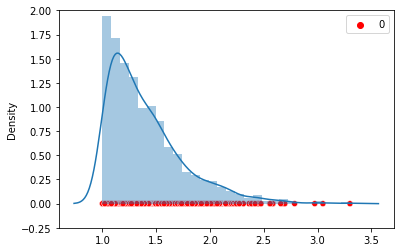

In [116]:
zero = [0 for i in range(len(X))]
df = pd.DataFrame(zero,X)
fig2 = sns.scatterplot(data = df,marker = '^',palette = ['r'])
fig2 = sns.distplot(X)
plt.ylim(-.25,2)

# Problem 4

In [285]:
r = 0.01
theta = 0.08
k = 2
Beta = 0.2
rho = -0.7
Y0 = 0.04
S0 = 50 
A = 80
B = 30
K = 50
n = 10000
dt = (1/3)/360
days = 90/360

In [286]:
Pairs = list()
Ypaths = list()
Spaths = list()

for i in range(n):
    Y = list()
    S = list()
    Y.append(Y0)
    S.append(S0)
    
    for _ in range(int(days/dt)):
        rand1 = np.random.normal(0,1)
        Ynext = Y[-1] + k*(theta/k-Y[-1])*dt + Beta*np.sqrt(Y[-1])*(rho*np.sqrt(dt)*rand1 + np.sqrt(1-rho**2)*np.sqrt(dt)*np.random.normal(0,1))
        Snext = S[-1] + r*S[-1]*dt + np.sqrt(Y[-1])*S[-1]*np.sqrt(dt)*rand1
        
        if Ynext < 0:
            Ynext = 0
            Y.append(Ynext)
        else:
            Y.append(Ynext)
            
        S.append(Snext)
    
    Ypaths.append(Y)
    Spaths.append(S)

In [287]:
terminalY = [Path[-1] for Path in Ypaths]
terminalS = [Path[-1] for Path in Spaths]

In [288]:
expectedY = sum(terminalY)/len(terminalY)
expectedS = sum(terminalS)/len(terminalS)
expectedS,expectedY

(50.10907720968314, 0.040115502019253305)

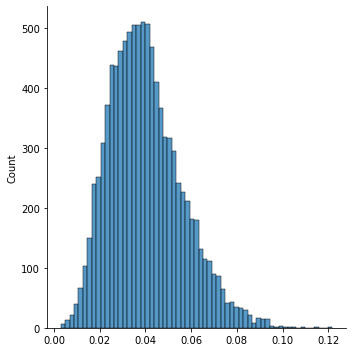

In [289]:
sns.displot(terminalY)

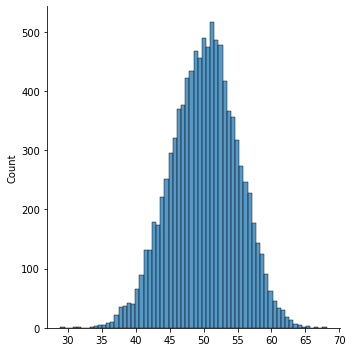

In [297]:
sns.displot(terminalS)

In [298]:
convergeS = list()
convergeY = list()
ES = 0
EY = 0

for i in range(n):
    ES += terminalS[i]
    EY += terminalY[i]
    
    convergeS.append(ES/i)
    convergeY.append(EY/i)

/var/folders/bv/j678dvtd34bc5mtymgsd2c6w0000gn/T/ipykernel_74024/1735570090.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  convergeS.append(ES/i)
/var/folders/bv/j678dvtd34bc5mtymgsd2c6w0000gn/T/ipykernel_74024/1735570090.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  convergeY.append(EY/i)


In [299]:
print("The number of paths used is: ",n)
print("The final estimate of expected S is: ",expectedS)
print("The final estimate of expected Y is: ",expectedY)
print("The standard error of expected S is: ",np.std(np.array(convergeS[1:])))
print("The standard error of expected Y is: ",np.std(np.array(convergeY[1:])))

The number of paths used is:  10000
The final estimate of expected S is:  50.10907720968314
The final estimate of expected Y is:  0.040115502019253305
The standard error of expected S is:  0.6000622771919076
The standard error of expected Y is:  0.000624858146651417


<AxesSubplot:>

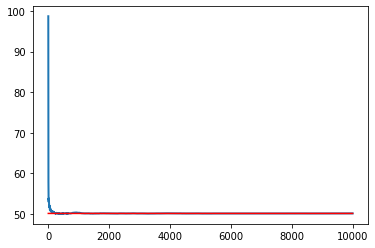

In [300]:
sns.lineplot(data = convergeS[1:],linewidth=2)
sns.lineplot(data = np.ones(n)*expectedS,color='red')

<AxesSubplot:>

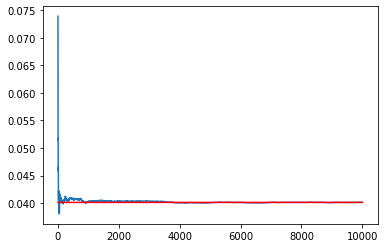

In [301]:
sns.lineplot(data = convergeY)
sns.lineplot(data = np.ones(n)*expectedY,color='red')

In [302]:
optionPrice = list()

for i in range(len(Spaths)):
    
    if (max(Spaths[i]) > A) or (min(Spaths[i]) < B):
        optionPrice.append(0)
    else:
        optionPrice.append(max(Spaths[i][-1] - K,0))
            

In [303]:
optionPriceInitial = sum(optionPrice)/len(optionPrice)
optionPriceInitial

2.0311188574285244